# 5. MAPEAMENTO DE ISÓCRONAS PARA ANÁLISE DE ACESSIBILIDADE ESPACIAL


## 5.1 Introdução

Uma **isócrona** é uma representação espacial que delimita áreas acessíveis dentro de um intervalo de tempo, distância ou custo, a partir de um ponto específico em uma rede, como redes viárias, ferroviárias, hidrográficas, de transporte público ou até mesmo redes não físicas, como as de telecomunicações ou energia. Essas representações são amplamente utilizadas em análises de acessibilidade, conectividade e alcance, desempenhando um importante papel no planejamento urbano, na logística, no transporte e em outras áreas.

O cálculo de isócronas baseia-se em grafos que modelam as redes espaciais. Esses grafos são compostos por nós, que representam interseções ou pontos de interesse, e arestas, que correspondem às conexões entre os nós, como ruas, rotas de transporte ou tubulações (conforme estudamos em capítulos anteriores). Cada aresta possui um peso associado, como tempo de deslocamento, distância ou custos específicos. A partir de um ponto de origem, algoritmos como Dijkstra ou A* são utilizados para identificar os nós que podem ser alcançados dentro do intervalo especificado, conectando-os para formar um polígono que representa a isócrona.

As isócronas possuem diversas aplicações práticas. No transporte público, ajudam a identificar a cobertura do sistema e localizar áreas com baixa acessibilidade. Em logística, são utilizadas para planejar zonas de entrega com base em tempos de deslocamento. No planejamento urbano, auxiliam na avaliação da acessibilidade a serviços essenciais, como postos de saúde ou escolas. Em redes de energia, permitem analisar a abrangência do fornecimento de uma subestação. Na análise ambiental, podem modelar a propagação de poluentes em rios ou a acessibilidade a áreas de conservação. Em telecomunicações, ajudam a avaliar o alcance de sinais de internet ou a latência em redes.


### 5.1.1 Envoltórias convexas vs. Buffers: Métodos para delimitação de isócronas

O cálculo de isócronas em redes espaciais pode ser realizado utilizando duas abordagens principais: **envoltórias convexas (convex hull)** e **buffers**. Cada uma apresenta características, vantagens e limitações, sendo indicada conforme o nível de precisão e o objetivo da análise.


**Envoltórias Convexas (Convex Hull)**

A abordagem de **envoltórias convexas** gera um polígono que envolve todos os pontos acessíveis dentro de um intervalo de tempo ou distância especificado. A envoltória convexa é a menor forma convexa que contém esses pontos.

**Características:**
- **Simplicidade**: É rápido e computacionalmente eficiente.
- **Forma geométrica**: Conecta os pontos acessíveis com bordas externas, sem considerar áreas inacessíveis ou restrições da rede.
- **Limitação**: Inclui áreas que podem não ser alcançáveis na prática, especialmente em redes com geometrias irregulares ou com barreiras físicas.

**Uso indicado:**  
As envoltórias convexas são adequadas para análises exploratórias ou aproximações rápidas, onde alta precisão não é necessária.



**Buffers**

A abordagem de **buffers** delimita uma área de influência em torno das arestas ou nós de acesso, respeitando as geometrias reais da rede espacial. Dessa maneira, o resultado reflete com maior fidelidade os limites da acessibilidade.

**Características:**
- **Precisão**: Gera uma representação detalhada, capturando apenas as áreas próximas às vias ou pontos de acesso.
- **Flexibilidade**: Permite ajustes no tamanho do buffer para diferentes cenários, como vias mais largas ou estreitas.
- **Custo computacional**: É mais exigente em termos de processamento, especialmente em redes densas ou grandes áreas.

**Uso indicado:**  
Os buffers são preferíveis quando é necessária uma análise detalhada da acessibilidade, como em estudos urbanos ou planejamento de serviços essenciais.



**Comparação entre envoltórias convexas e buffers**

| **Aspecto**             | **Envoltória convexa**                      | **Buffers**                               |
|-------------------------|------------------------------------------|------------------------------------------|
| **Precisão**            | Aproximada                              | Alta                                     |
| **Complexidade**        | Baixa                                   | Moderada                                 |
| **Velocidade**          | Alta                                    | Menor                                    |
| **Adequação**           | Análises rápidas e exploratórias        | Estudos detalhados e precisos            |






### 5.1.2 A biblioteca OSMnx


Ferramentas computacionais são indispensáveis para calcular e analisar isócronas. Bibliotecas como OSMnx e NetworkX, em Python, permitem modelar redes complexas e realizar análises de acessibilidade. Softwares de geoprocessamento, como QGIS e ArcGIS, também oferecem funcionalidades para a geração de isócronas a partir de dados espaciais. Além disso, APIs especializadas, como Google Maps API e OpenRouteService API, integram cálculos de isócronas a sistemas automatizados.


No **OSMnx**, o cálculo de isócronas envolve a criação de um grafo de rede espacial, a definição de um ponto de origem e a aplicação de algoritmos de busca para identificar as áreas acessíveis dentro de um intervalo de tempo ou distância. A seguir, explico o processo de forma estruturada:

a. **Obtenção da Rede Espacial**  
   O OSMnx utiliza dados do **OpenStreetMap** para construir um grafo que representa a rede espacial. Essa rede pode ser viária, cicloviária, de transporte público, entre outras. O grafo é estruturado da seguinte maneira:  
   - **Nós**: representam interseções ou pontos de mudança de rota.  
   - **Arestas**: correspondem aos segmentos que conectam os nós e incluem atributos relevantes, como comprimento, velocidade permitida, tipo de via ou qualquer outra métrica associada ao deslocamento.

b. **Definição do Ponto de Origem**  
   O ponto de origem é a localização a partir da qual se deseja calcular a acessibilidade. Esse ponto é convertido para o nó correspondente no grafo, garantindo que os cálculos sejam realizados diretamente na rede modelada.

c. **Cálculo das Isócronas**  
   Utilizam-se algoritmos de busca, como **Dijkstra** ou **A***, para calcular as distâncias ou tempos de deslocamento a partir do ponto de origem até outros nós da rede. Com base no intervalo especificado (por exemplo, 15 minutos ou 2 km), identifica-se um subconjunto de nós que atendem ao critério de acessibilidade.

d. **Formação da Isócrona**  
   Os nós de acesso são conectados para formar um polígono que representa a isócrona. Este polígono pode ser visualizado sobre uma figura para facilitar a análise.




## 5.2 Análise de acessibilidade e isócronas


Vamos explorar técnicas para calcular e visualizar isócronas em redes viárias urbanas utilizando a biblioteca OSMnx e ferramentas geoespaciais, analisaremos a acessibilidade com base no **tempo de viagem** e **distância percorrida**, considerando dois cenários distintos:

a. **Cenário 1: Isócronas a partir do Centróide do Bairro**  
   Calcularemos isócronas utilizando dois métodos:
   - **Convex Hull**: Criação de uma envoltória convexa ao redor dos nós e arestas alcançáveis.
   - **Buffers**: Aplicação de áreas de buffer em torno de nós e arestas para delimitar as isócronas.  
   Nesses cálculos, o ponto central será o **centróide do bairro da Liberdade**. A análise considerará diferentes tempos de viagem e distâncias para identificar áreas acessíveis a pé.

b. **Cenário 2: Isócronas a partir de um Hospital**  
   Neste exemplo, definiremos um ponto de interesse específico: um **hospital no bairro da Liberdade**, em São Paulo. A partir desse ponto, calcularemos isócronas utilizando o método de **buffers** para identificar áreas acessíveis em função do tempo de viagem e da distância percorrida. O objetivo é avaliar a acessibilidade a pé para a população ao redor do hospital.


Em ambos os cenários, trabalharemos com as seguintes etapas principais:
- **Preparação dos Dados**: Configuração do grafo da rede viária e escolha do ponto central (centróide ou hospital).
- **Cálculo das Isócronas**: Geração de polígonos representando áreas acessíveis usando os métodos selecionados.
- **Visualização dos Resultados**: Plotagem das isócronas sobre o grafo da rede viária, destacando áreas alcançáveis e o ponto de origem.



Antes de iniciar, é necessário garantir que a biblioteca OSMnx e seus pacotes dependentes estão instalados no ambiente. Para isso, execute o comando:

In [30]:
!pip install osmnx

As bibliotecas abaixo são usadas para manipular e visualizar dados geoespaciais, além de realizar cálculos na rede.

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import transform
from pyproj import Transformer
from matplotlib.lines import Line2D

As análises serão realizadas no bairro da Liberdade, São Paulo. Utilizaremos o grafo correspondente a rede viária para pedestres (tipo_rede = "walk").

In [32]:
# Obter o grafo
bairro = "Liberdade, São Paulo, Brazil"
grafo_rede_viaria = ox.graph_from_place(bairro, network_type='walk')

Vamos reprojetar o grafo para um sistema de coordenadas plano, facilitando cálculos de distância.

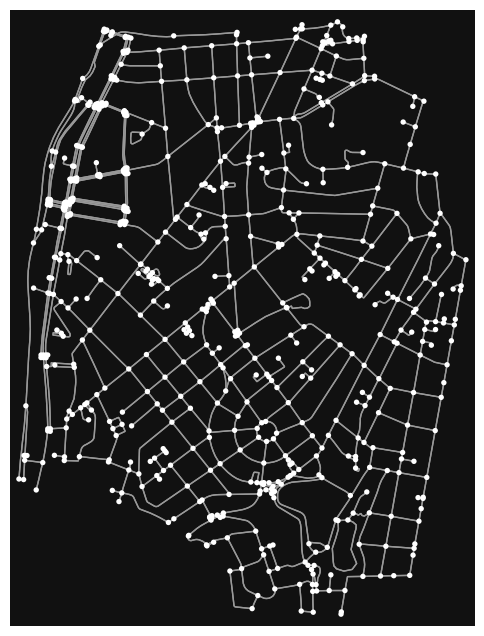

In [33]:
# Reprojetar o grafo
grafo_rede_viaria = ox.project_graph(grafo_rede_viaria)

# Plotar o grafo
fig, ax = ox.plot_graph(grafo_rede_viaria)
plt.show()

## 5.3 Cálculo de isócronas com base no centróide


Nesta seção, calcularemos as isócronas a partir do **centróide do bairro da Liberdade**, utilizando dois métodos distintos: **Envoltória convexa (Convex Hull)** e **Buffers**. Esses métodos serão aplicados considerando tanto **tempos de viagem** quanto **distâncias percorridas**.



### 5.3.1 Parâmetros e preparação para cálculo das isócronas

Inicialmente, definimos os seguintes parâmetros:
- Velocidade de deslocamento (em km/h).
- Tempos de viagem (em minutos) ou distâncias de deslocamento (em metros).

In [34]:
velocidade_deslocamento = 4.5  # Velocidade de caminhada em km/h
tempos_viagem = [5, 10, 15, 20]  # Tempos de viagem em minutos
distancias_deslocamento = [300, 600, 900, 1200]  # Distâncias de deslocamento em metros

O nodo central é definido com base no centróide geométrico da área de interesse.

In [35]:
nodos_gdf = ox.graph_to_gdfs(grafo_rede_viaria, edges=False)
x, y = nodos_gdf["geometry"].unary_union.centroid.xy
nodo_central = ox.distance.nearest_nodes(grafo_rede_viaria, x[0], y[0])

<ipython-input-35-baf87d66a5d2>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  x, y = nodos_gdf["geometry"].unary_union.centroid.xy


Vamos adicionar uma métrica de tempo de viagem às arestas do grafo com base na velocidade de deslocamento e no comprimento das arestas.

In [36]:
metros_por_minuto = velocidade_deslocamento * 1000 / 60  # Converter km/h para m/min
for _, _, _, dados in grafo_rede_viaria.edges(data=True, keys=True):
    if "length" in dados:
        dados["tempo_viagem"] = dados["length"] / metros_por_minuto

Verifique os atributos disponíveis nas arestas para garantir que o tempo de viagem foi adicionado corretamente.

In [37]:
atributos_arestas = list(next(iter(grafo_rede_viaria.edges(data=True)))[2].keys())
print("Atributos das arestas:", atributos_arestas)

Atributos das arestas: ['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'reversed', 'length', 'tempo_viagem']


Vamos trabalhar nas configurações de plotagem dos mapas de isócronas.

In [38]:
# Obter uma lista de cores para as isócronas
cores_isocronas = ox.plot.get_colors(n=len(tempos_viagem), cmap="plasma", start=0)

cores_nodos = {}
for tempo_viagem, cor in zip(sorted(tempos_viagem, reverse=True), cores_isocronas):
    subgrafo = nx.ego_graph(grafo_rede_viaria, nodo_central, radius=tempo_viagem, distance="tempo")
    for nodo in subgrafo.nodes():
        cores_nodos[nodo] = cor

# Define as cores e tamanhos dos nós
cores_nodos_final = [cores_nodos[nodo] if nodo in cores_nodos else "none" for nodo in grafo_rede_viaria.nodes()]
tamanhos_nodos = [15 if nodo in cores_nodos else 0 for nodo in grafo_rede_viaria.nodes()]

Por fim, plotaremos a figura.

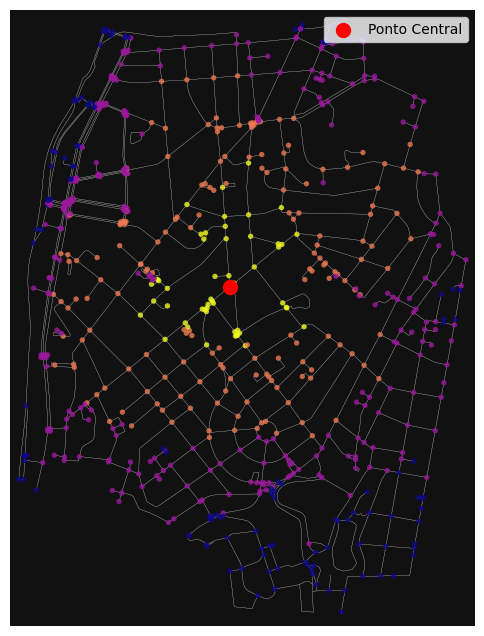

In [39]:
# Plotar o grafo
figura, eixo = ox.plot_graph(
    grafo_rede_viaria,
    node_color=cores_nodos_final,
    node_size=tamanhos_nodos,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
    show=False,
    close=False,
)

# Adicionar o ponto central ao gráfico
nodo_central_x, nodo_central_y = grafo_rede_viaria.nodes[nodo_central]["x"], grafo_rede_viaria.nodes[nodo_central]["y"]
eixo.scatter(nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central")

# Adicionar a legenda
plt.legend(loc="upper right")

# Mostrar o gráfico
plt.show()

### 5.3.2 Cálculo de isócronas utilizando a envoltória convexa


### 5.3.2.1 Isócronas a partir de envoltória convexa considerando o tempo de viagem

Para gerar as isócronas, inicialmente havíamos definido intervalos de tempo. Estes intevalos determinam os limites de deslocamento a partir de um ponto na rede viária. Para cada intervalo de tempo, cria-se um **subgrafo** contendo os nós acessíveis dentro do limite especificado. As coordenadas desses nós são utilizadas para formar polígonos que delimitam as áreas alcançáveis. Os polígonos gerados são armazenados em um `GeoDataFrame` para facilitar a manipulação e visualização.

Para cada intervalo de tempo, criaremos um subgrafo e um polígono delimitador baseado nos nós acessíveis.

In [40]:
poligonos_isocronas_tempo = []
for tempo in sorted(tempos_viagem, reverse=True):
    subgrafo = nx.ego_graph(grafo_rede_viaria, nodo_central, radius=tempo, distance="tempo_viagem")
    pontos_nodos = [Point((dados["x"], dados["y"])) for nodo, dados in subgrafo.nodes(data=True)]
    if pontos_nodos:
        poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
        poligonos_isocronas_tempo.append(poligono_limite)

<ipython-input-40-313b621782d1>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
<ipython-input-40-313b621782d1>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
<ipython-input-40-313b621782d1>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
<ipython-input-40-313b621782d1>:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull


Um `GeoDataFrame` armazena os polígonos gerados.

In [41]:
gdf_isocronas = gpd.GeoDataFrame(geometry=poligonos_isocronas_tempo)

Por fim, plotamos as isócronas.

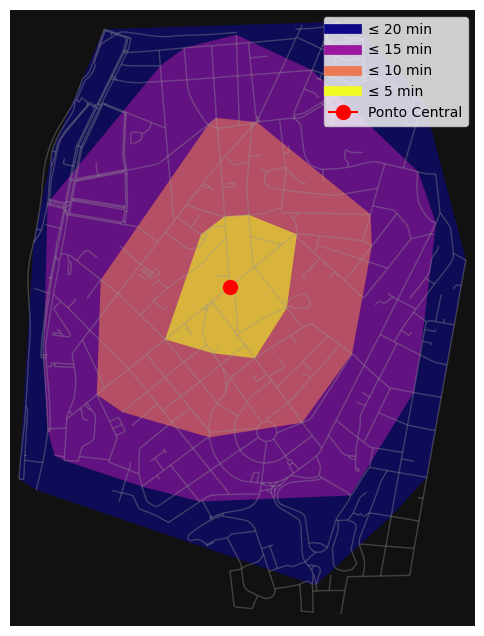

In [42]:
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
gdf_isocronas.plot(ax=eixo, color=cores_isocronas, ec="none", alpha=0.6, zorder=-1)
eixo.scatter(
    nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central"
)

# A legenda apresenta os intervalos de tempo e o ponto central.
legenda_tempos = [
    Line2D([0], [0], color=cores_isocronas[i], lw=7, label=f"≤ {tempo} min")
    for i, tempo in enumerate(sorted(tempos_viagem, reverse=True))
]
plt.legend(
    handles=legenda_tempos + [Line2D([0], [0], marker="o", color="red", label="Ponto Central", markersize=10)],
    loc="upper right"
)

# Por fim, o gráfico é exibido com as isócronas destacadas e a legenda.

plt.show()

### 5.3.2.2 Isócronas a partir de envoltória convexa considerando a distância percorrida

Agora vamos calcular as isócronas com base na distância percorrida. Essas distâncias foram definidas no início de nosso código (variável *distancias_deslocamento*).

Inicialmente criamos uma lista para armazenar os polígonos delimitando as áreas alcançáveis para cada distância. Para cada valor de distância, um subgrafo contendo os nós acessíveis dentro do limite especificado é criado. Em seguida, um polígono delimitador é gerado.

In [43]:
# Lista para armazenar os polígonos das isócronas
poligonos_isocronas_dist = []


# Gerar os polígonos das isócronas usando convex hull
for distancia in sorted(distancias_deslocamento, reverse=True):  # Ordenar distâncias em ordem decrescente
    # Criar um subgrafo com os nós acessíveis dentro da distância
    subgrafo = nx.ego_graph(
        grafo_rede_viaria, nodo_central, radius=distancia, distance="length"
    )
    # Obter as coordenadas (x, y) de cada nó no subgrafo
    pontos_nodos = [Point((dados["x"], dados["y"])) for nodo, dados in subgrafo.nodes(data=True)]

    if pontos_nodos:  # Verificar se há nós no subgrafo
        # Criar o polígono delimitador (convex hull)
        poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
        poligonos_isocronas_dist.append(poligono_limite)
    else:
        print(f"Aviso: Nenhum nó encontrado para a distância de {distancia} metros.")


# Criar um GeoDataFrame com os polígonos das isócronas
gdf_isocronas_dist = gpd.GeoDataFrame(geometry=poligonos_isocronas_dist)


<ipython-input-43-ae187547ec56>:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
<ipython-input-43-ae187547ec56>:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
<ipython-input-43-ae187547ec56>:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull
<ipython-input-43-ae187547ec56>:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poligono_limite = gpd.GeoSeries(pontos_nodos).unary_union.convex_hull


Por fim, plotamos as isócronas.

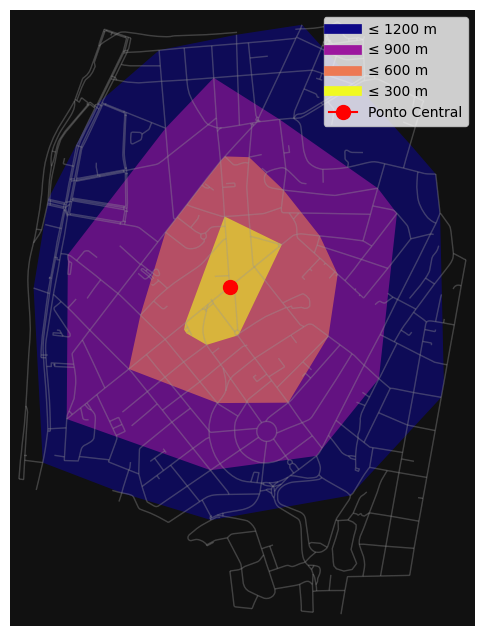

In [44]:
# Criar a figura e o eixo para o gráfico
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)

# Plotar os polígonos das isócronas no gráfico
gdf_isocronas_dist.plot(
    ax=eixo, color=cores_isocronas[:len(poligonos_isocronas_dist)], ec="none", alpha=0.6, zorder=-1
)

# Adicionar o ponto central ao gráfico
nodo_central_x = grafo_rede_viaria.nodes[nodo_central]["x"]
nodo_central_y = grafo_rede_viaria.nodes[nodo_central]["y"]
eixo.scatter(
    nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central"
)

# Criar a legenda para as isócronas
legenda_distancia = [
    Line2D([0], [0], color=cores_isocronas[i], lw=7, label=f"≤ {distancia} m")
    for i, distancia in enumerate(sorted(distancias_deslocamento, reverse=True))
]

# Adicionar a legenda ao gráfico
plt.legend(
    handles=legenda_distancia + [Line2D([0], [0], marker="o", color="red", label="Ponto Central", markersize=10)],
    loc="upper right"
)

# Exibir o gráfico
plt.show()


### 5.3.3 Cálculo de isócronas a partir de Buffers


Neste método, utilizamos buffers (áreas ao redor de nós e arestas) para criar as isócronas, ao invés de um polígono delimitador como o **Convex Hull**.

Para calcular as isócronas a partir de buffers, inicialmente criaremos uma função, que chamaremos de  `gerar_poligonos_isocronas`. Essa função gerará polígonos de isócronas com base em valores de uma métrica, aplicando buffers às arestas e nós.

A métrica refere-se a uma variável ou atributo utilizado para medir distâncias ou tempos dentro de uma rede. No contexto de análise de redes viárias, as métricas mais comuns são:

- Tempo de Viagem: Representa o tempo necessário para percorrer uma aresta (rua, caminho, etc.) com base em uma velocidade média de deslocamento.
- Distância Percorrida: Refere-se ao comprimento físico das arestas, geralmente medido em metros.


A função utiliza a **topologia do grafo** e a **geometria das conexões** para criar representações precisas das áreas alcançáveis, baseando-se no intervalo definido para a métrica escolhida, como o **tempo de viagem** ou a **distância percorrida**. O processo transforma as informações da rede em polígonos que delimitam visualmente as isócronas.

**Como Funciona o Processo**

a. **Identificação de Subgrafos pela Métrica**:  
   A função calcula um subgrafo, contendo todos os nós e arestas alcançáveis a partir do ponto central, de acordo com o limite imposto pela métrica selecionada (por exemplo, `"tempo_viagem"` ou `"length"`).

b. **Aplicação de Buffers**:  
   Buffers são aplicados em torno de:
   - **Nós**: Representando áreas acessíveis ao redor de interseções.
   - **Arestas**: Representando a largura das vias.  
   Essa etapa transforma a rede viária em áreas contínuas, simulando acessibilidade espacial.

c. **Criação do Polígono**:  
   As geometrias geradas pelos buffers são combinadas para formar um único polígono que representa a isócrona. Se a opção de preenchimento for ativada, furos internos são removidos, garantindo uma representação mais uniforme e contínua.



Abaixo temos o código para a criação da função.

In [45]:
def gerar_poligonos_isocronas(
    grafo, nodo_central, valores_metrica, metrica="tempo", buffer_arestas=25, buffer_nodos=0, preencher=True
):

    poligonos_isocronas = []

    # Iterar sobre os valores da métrica em ordem decrescente
    for valor in sorted(valores_metrica, reverse=True):
        # Criar um subgrafo com base na métrica escolhida
        subgrafo = nx.ego_graph(grafo, nodo_central, radius=valor, distance=metrica)

        # Criar GeoDataFrame para os nós
        pontos_nodos = [
            Point((dados["x"], dados["y"])) for _, dados in subgrafo.nodes(data=True) if "x" in dados and "y" in dados
        ]
        nodos_gdf = gpd.GeoDataFrame({"id": list(subgrafo.nodes)}, geometry=pontos_nodos).set_index("id")

        # Criar lista de geometrias para as arestas
        linhas_arestas = []
        for nodo_de, nodo_para in subgrafo.edges():
            dados_aresta = grafo.get_edge_data(nodo_de, nodo_para)
            if dados_aresta:  # Verificar se há dados da aresta
                # Obter geometria da aresta ou criar uma linha entre os nós
                geometria_aresta = dados_aresta.get(0, {}).get(
                    "geometry", LineString([nodos_gdf.loc[nodo_de].geometry, nodos_gdf.loc[nodo_para].geometry])
                )
                linhas_arestas.append(geometria_aresta)

        # Criar buffers para nós e arestas
        buffers_nodos = nodos_gdf.buffer(buffer_nodos).geometry
        buffers_arestas = gpd.GeoSeries(linhas_arestas).buffer(buffer_arestas).geometry

        # Combinar todas as geometrias e formar a isócrona
        todas_geometrias = list(buffers_nodos) + list(buffers_arestas)
        nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union

        # Preencher o polígono se solicitado
        if preencher and isinstance(nova_isocrona, Polygon):
            nova_isocrona = Polygon(nova_isocrona.exterior)  # Remove buracos internos

        poligonos_isocronas.append(nova_isocrona)

    return poligonos_isocronas

Vamos a uma explicação detalhada do código acima.

**Parâmetros da Função**
- **`grafo`**: O grafo da rede viária (do tipo NetworkX), geralmente obtido com OSMnx.
- **`nodo_central`**: O ponto de partida para calcular as isócronas.
- **`valores_metrica`**: Lista de valores (tempo ou distância) que definem os limites de cada isócrona.
- **`metrica`**: Nome do atributo usado para calcular os limites (`"tempo"` ou `"length"`).
- **`buffer_arestas`**: Raio do buffer aplicado às arestas, representando largura das vias (em metros).
- **`buffer_nodos`**: Raio do buffer aplicado aos nós, representando áreas ao redor de interseções (em metros).
- **`preencher`**: Se **True**, remove buracos internos nos polígonos para obter isócronas preenchidas.

**Retorno**
- Lista de polígonos das isócronas, representando as áreas alcançáveis para cada valor da métrica.


Para cada valor da métrica (tempo ou distância), a função:
- Cria um **subgrafo** contendo nós e arestas acessíveis dentro do limite definido.
- Extrai as coordenadas dos nós para formar geometrias pontuais.
- Gera geometrias de linhas para as arestas.

```python
for valor in sorted(valores_metrica, reverse=True):
    subgrafo = nx.ego_graph(grafo, nodo_central, radius=valor, distance=metrica)
    pontos_nodos = [Point((dados["x"], dados["y"])) for _, dados in subgrafo.nodes(data=True) if "x" in dados and "y" in dados]
```


Buffers são gerados em torno de:
1. **Nós**: Representando áreas ao redor de interseções.
2. **Arestas**: Representando a largura das vias.

```python
buffers_nodos = nodos_gdf.buffer(buffer_nodos).geometry
buffers_arestas = gpd.GeoSeries(linhas_arestas).buffer(buffer_arestas).geometry
```


As geometrias de nós e arestas são combinadas para formar um polígono de isócrona. Caso solicitado, furos internos no polígono são removidos:
```python
todas_geometrias = list(buffers_nodos) + list(buffers_arestas)
nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union

if preencher and isinstance(nova_isocrona, Polygon):
    nova_isocrona = Polygon(nova_isocrona.exterior)  # Remove furos internos
```


O polígono gerado é adicionado à lista final de isócronas:
```python
poligonos_isocronas.append(nova_isocrona)
```





### 5.3.3.1 Isócronas a partir de buffer considerando o tempo de viagem


Para o cálculo de isócronas a partir de buffer considerando o tempo de viagem, inicialmente chamamos a função `gerar_poligonos_isocronas`, que gerará os polígonos das isócronas. Como vimos acima, os parâmetros incluem o grafo da rede, o nó central, os valores de tempo de viagem e os tamanhos de buffer aplicados às arestas e nós.

In [46]:
poligonos_tempo = gerar_poligonos_isocronas(
    grafo=grafo_rede_viaria,
    nodo_central=nodo_central,
    valores_metrica=tempos_viagem,
    metrica="tempo_viagem",  # Baseado no tempo de viagem
    buffer_arestas=20,  # Buffer nas arestas (em metros)
    buffer_nodos=0,  # Buffer nos nós (em metros)
    preencher=True  # Preencher os polígonos
)

<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union


Cada polígono é associado a um tempo máximo de viagem. Para verificar o resultado, os polígonos são exibidos no console.

In [47]:
for i, poligono in enumerate(poligonos_tempo):
    print(f"Isócrona para tempo ≤ {tempos_viagem[i]} minutos:", poligono)

Isócrona para tempo ≤ 5 minutos: POLYGON ((332516.2545209365 7392051.258597353, 332515.93159605283 7392051.461213419, 332515.4565146568 7392051.828806351, 332514.967773431 7392052.178032481, 332514.6808119006 7392052.429004239, 332514.3793018412 7392052.662296823, 332513.9425385049 7392053.07468581, 332513.4903808433 7392053.470135342, 332513.2294006447 7392053.748025752, 332512.952209111 7392054.009748122, 332512.55797009857 7392054.462961636, 332512.1467505321 7392054.900826172, 332511.91426504694 7392055.202958996, 332511.66406154534 7392055.490590623, 332511.31614359486 7392055.980263969, 332510.94982239197 7392056.456326635, 332510.74807058414 7392056.779792168, 332510.5272647095 7392057.090563002, 332510.2290184613 7392057.611980358, 332509.9111234951 7392058.12165641, 332509.7420483421 7392058.4633395085, 332509.55276657845 7392058.794256653, 332509.30706430686 7392059.342396484, 332509.04065707966 7392059.880777464, 332508.90588686994 7392060.237387528, 332508.74995210185 73920

Os polígonos gerados são armazenados em um `GeoDataFrame` para facilitar a manipulação e visualização.

In [48]:
gdf_isocronas_tempo = gpd.GeoDataFrame(geometry=poligonos_tempo)

Por fim, plotaremos as isócronas.

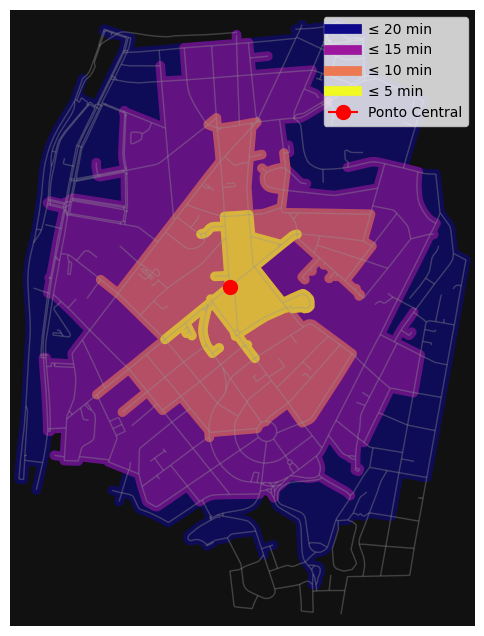

In [49]:
# Definir cores das isócronas
cores_isocronas = ox.plot.get_colors(n=len(tempos_viagem), cmap="plasma", start=0)

# Plotar a rede viária e os polígonos das isócronas
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
gdf_isocronas_tempo.plot(ax=eixo, color=cores_isocronas, ec="none", alpha=0.6, zorder=-1)

# Adicionar o ponto central ao gráfico
nodo_central_x, nodo_central_y = grafo_rede_viaria.nodes[nodo_central]["x"], grafo_rede_viaria.nodes[nodo_central]["y"]
eixo.scatter(nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central")



# Criar a legenda com cores associadas aos tempos de viagem
legenda_tempos = [
    Line2D([0], [0], color=cores_isocronas[i], lw=7, label=f"≤ {tempo} min")
    for i, tempo in enumerate(sorted(tempos_viagem, reverse=True))
]

# Adicionar o ponto central à legenda
legenda_ponto_central = Line2D([0], [0], marker="o", color="red", label="Ponto Central", markersize=10)

# Adicionar a legenda ao gráfico
plt.legend(
    handles=legenda_tempos + [legenda_ponto_central],
    loc="upper right"
)

# Mostrar o gráfico
plt.show()

### 5.3.2.2 Isócronas a partir de buffer considerando a distância percorrida

Agora vamos calcular as isócronas tendo como base as distâncias percorridas.


Utilizamos a função `gerar_poligonos_isocronas` para criar os polígonos das isócronas com base na distância, utilizando parâmetros específicos como a métrica escolhida (`"length"`):

In [50]:
poligonos_distancia = gerar_poligonos_isocronas(
    grafo=grafo_rede_viaria,
    nodo_central=nodo_central,
    valores_metrica=distancias_deslocamento,
    metrica="length",  # Baseado na distância
    buffer_arestas=20,  # Buffer nas arestas (em metros)
    buffer_nodos=5,  # Buffer nos nós (em metros)
    preencher=True  # Preencher os polígonos
)

<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union


Cada polígono é associado a um limite máximo de distância. Os polígonos são impressos no console para validação.

In [51]:
for i, poligono in enumerate(poligonos_distancia):
    print(f"Isócrona para distância ≤ {distancias_deslocamento[i]} metros:", poligono)

Isócrona para distância ≤ 300 metros: POLYGON ((332611.39895813284 7392534.907790892, 332610.2937204639 7392553.2682560515, 332609.6884518602 7392553.589233842, 332609.02930423635 7392553.918364178, 332608.8218557543 7392554.048795268, 332608.605367923 7392554.163600141, 332607.9914439858 7392554.5709080845, 332607.36773073685 7392554.963061344, 332607.17406565597 7392555.113197881, 332606.9698731205 7392555.248669454, 332606.398828546 7392555.714191174, 332605.81655639666 7392556.16559069, 332605.6385398267 7392556.333986769, 332605.4486090636 7392556.488820384, 332604.92594332166 7392557.0080726575, 332604.3907198725 7392557.514371202, 332604.23006620276 7392557.699405083, 332604.0562263567 7392557.872109602, 332603.5869730255 7392558.440091724, 332603.10395274963 7392558.9964133855, 332602.96220915904 7392559.1963030975, 332602.8061344066 7392559.385215276, 332602.39481264557 7392559.996457272, 332601.96864729887 7392560.597444365, 332601.84717886103 7392560.810264854, 332601.710372

Os polígonos das isócronas são armazenados em um `GeoDataFrame` para manipulação e visualização.

In [52]:
gdf_isocronas_distancia = gpd.GeoDataFrame(geometry=poligonos_distancia)

Por fim, plotamos as isócronas.

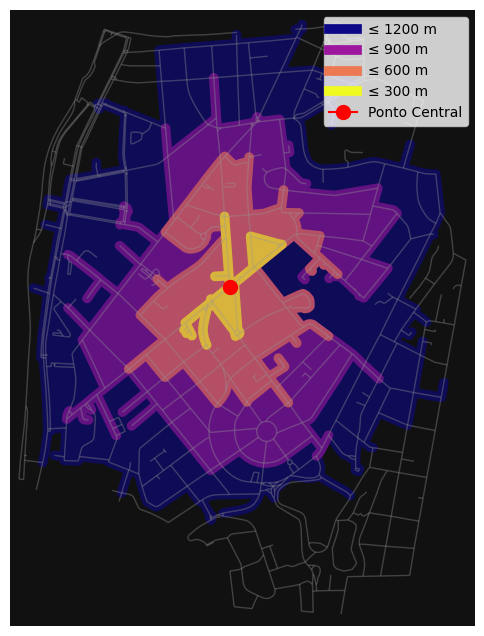

In [53]:
# Definir cores das isócronas
cores_isocronas = ox.plot.get_colors(n=len(distancias_deslocamento), cmap="plasma", start=0)

# Plotar a rede viária e os polígonos das isócronas
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
gdf_isocronas_distancia.plot(ax=eixo, color=cores_isocronas, ec="none", alpha=0.6, zorder=-1)

# Adicionar o ponto central ao gráfico
nodo_central_x, nodo_central_y = grafo_rede_viaria.nodes[nodo_central]["x"], grafo_rede_viaria.nodes[nodo_central]["y"]
eixo.scatter(nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central")

# Criar a legenda com cores associadas às distâncias de deslocamento
legenda_distancias = [
    Line2D([0], [0], color=cores_isocronas[i], lw=7, label=f"≤ {distancia} m")
    for i, distancia in enumerate(sorted(distancias_deslocamento, reverse=True))
]

# Adicionar o ponto central à legenda
legenda_ponto_central = Line2D([0], [0], marker="o", color="red", label="Ponto Central", markersize=10)

# Adicionar a legenda ao gráfico
plt.legend(
    handles=legenda_distancias + [legenda_ponto_central],
    loc="upper right"
)

# Mostrar o gráfico
plt.show()

## 5.4 Cálculo de isócronas com base em um ponto de interesse

Neste exemplo, calcularemos as isócronas de acessibilidade a partir do Hospital A. C. Camargo Câncer Center, localizado no bairro da Liberdade, em São Paulo. O objetivo é identificar as áreas acessíveis a pé a partir deste ponto, considerando diferentes tempos de deslocamento e distâncias. As etapas envolvem a identificação do hospital, a localização do ponto de interesse no grafo da rede viária e a geração das isócronas.


### 5.4.1 Identificação e seleção do ponto de interesse


Utilizaremos a tag `{"amenity": "hospital"}` para buscar edifícios classificados como hospitais na região definida.

In [54]:
# Definir a tag para buscar contornos de edifícios
tags = {"amenity": "hospital"}

# Extraindo contornos de edifícios no bairro da Liberdade
gdf_hospitais = ox.features_from_place(bairro, tags)
print(gdf_hospitais.shape)  # Exibe o número de edifícios encontrados
gdf_hospitais.head()

(8, 32)


geometry  \
element id                                                               
node    4902197627                         POINT (-46.63196 -23.55932)   
        10005127700                        POINT (-46.63515 -23.56544)   
way     277076508    POLYGON ((-46.63854 -23.56498, -46.63822 -23.5...   
        431470580    POLYGON ((-46.63428 -23.56351, -46.63426 -23.5...   
        1072628517   POLYGON ((-46.62841 -23.57153, -46.62839 -23.5...   

                      amenity healthcare                                name  \
element id                                                                     
node    4902197627   hospital   hospital                      Santa Margiore   
        10005127700  hospital   hospital  Hospital A C Camargo Câncer Center   
way     277076508    hospital   hospital  Hospital A C Camargo Câncer Center   
        431470580    hospital   hospital    Hospital Adventista de São Paulo   
        1072628517   hospital   hospital       Hospedaria de Cuidados Palhat   

                    addr:country addr:housenumber addr:postcode  \
element id                                                        
node    4902197627           NaN              NaN           NaN   
        10005127700          NaN              NaN           NaN   
way     277076508             BR              211     01509-010   
        431470580            NaN               49     01525-010   
        1072628517           NaN              992           NaN   

                                        addr:street  \
element id                                            
node    4902197627                              NaN   
        10005127700                             NaN   
way     277076508    Rua Professor Antônio Prudente   
        431470580                   Rua Rocha Pombo   
        1072628517               Rua Muniz de Souza   

                                                              alt_name  \
element id                                                               
node    4902197627                                                 NaN   
        10005127700                                                NaN   
way     277076508    Hospital Antônio Cândido de Camargo Câncer Center   
        431470580                                                  NaN   
        1072628517                                                 NaN   

                                                  contact:facebook  ...  \
element id                                                          ...   
node    4902197627                                             NaN  ...   
        10005127700                                            NaN  ...   
way     277076508    http://www.facebook.com/accamargocancercenter  ...   
        431470580                                              NaN  ...   
        1072628517                                             NaN  ...   

                                                 healthcare:speciality height  \
element id                                                                      
node    4902197627                                                 NaN    NaN   
        10005127700                                                NaN    NaN   
way     277076508                                                  NaN    NaN   
        431470580    oncology;haematology;urology;endoscopia;ortope...  8.728   
        1072628517                                                 NaN    NaN   

                                phone source  \
element id                                     
node    4902197627                NaN    NaN   
        10005127700               NaN    NaN   
way     277076508                 NaN    NaN   
        431470580    +55 11 2838 7000   pmsp   
        1072628517                NaN    NaN   

                                                               website  \
element id                                                               
node    4902197627          

Os hospitais encontrados são exibidos em um gráfico para inspeção.

<Axes: >

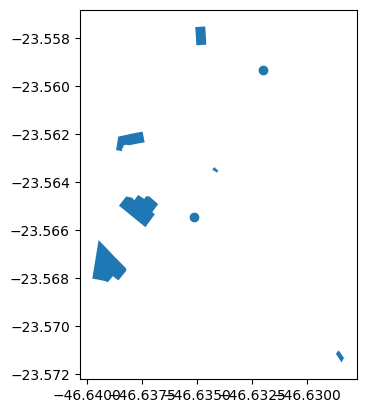

In [55]:
# Visualizar os hospitais encontrados
gdf_hospitais.plot()

Filtramos o hospital de interesse pelo seu identificador único (id).

In [56]:
# Filtrar o hospital de interesse pelo seu identificador único
hospital_id = 277076508
gdf_hospitais = gdf_hospitais.reset_index()  # Redefinir o índice para usar o "osmid" como coluna
hospital = gdf_hospitais[gdf_hospitais["id"] == hospital_id]

# Verificar se o hospital foi encontrado
if hospital.empty:
    print("Hospital não encontrado.")
else:
    hospital_coords = hospital.geometry.iloc[0]
    print(f"Hospital selecionado: {hospital['name'].iloc[0]}")

Hospital selecionado: Hospital A C Camargo Câncer Center


O hospital selecionado é visualizado para garantir que as coordenadas estão corretas.

<Axes: >

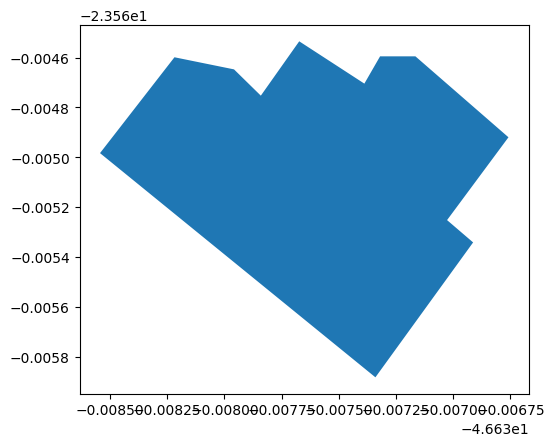

In [57]:
# Visualizar o hospital selecionado
hospital.plot()

Verificamos e ajustamos o sistema de referência espacial (CRS) do grafo da rede viária para garantir compatibilidade com as coordenadas do hospital.

In [58]:
# Verificar o sistema de referência espacial (CRS) do grafo
print("CRS do grafo (grafo_rede_viaria):", grafo_rede_viaria.graph["crs"])

# Verificar o tipo de geometria do hospital
print("Tipo de geometria:", type(hospital_coords))


CRS do grafo (grafo_rede_viaria): EPSG:32723
Tipo de geometria: <class 'shapely.geometry.polygon.Polygon'>


Para manipular as coordenadas do hospital, criamos um `GeoDataFrame` temporário assumindo o sistema de referência espacial (CRS) inicial como **WGS84 (EPSG:4326)**, que é o padrão do Open Street Map.

In [59]:
gdf_hospital = gpd.GeoDataFrame(geometry=[hospital_coords], crs="EPSG:4326")

Como o grafo da rede viária está em um sistema de projeção diferente, reprojetamos as coordenadas do hospital para coincidir.

In [60]:
gdf_hospital = gdf_hospital.to_crs(grafo_rede_viaria.graph["crs"])

Após a reprojeção, as novas coordenadas do hospital são extraídas.

In [61]:
hospital_coords_reprojetado = gdf_hospital.geometry.iloc[0]

Caso o hospital tenha uma geometria complexa (por exemplo, um polígono), o centróide da área é calculado para representar sua posição central.

In [62]:
centroide_hospital = hospital_coords_reprojetado.centroid

Com o centróide, utilizamos a função `nearest_nodes` do OSMnx para localizar o nó mais próximo na rede viária.

In [63]:
nodo_central = ox.distance.nearest_nodes(
    grafo_rede_viaria,
    X=centroide_hospital.x,
    Y=centroide_hospital.y
)

Exibimos os sistemas de referência espacial e as coordenadas reprojetadas para validação.

In [64]:
print("CRS do grafo (grafo_rede_viaria):", grafo_rede_viaria.graph["crs"])
print("CRS do hospital reprojetado:", gdf_hospital.crs)
print("Centróide do hospital reprojetado (X, Y):", centroide_hospital.x, centroide_hospital.y)
print("Nó mais próximo ao centróide:", nodo_central)

CRS do grafo (grafo_rede_viaria): EPSG:32723
CRS do hospital reprojetado: EPSG:32723
Centróide do hospital reprojetado (X, Y): 332868.5456656821 7392965.978610221
Nó mais próximo ao centróide: 8564832235


Para visualização, criamos um gráfico que inclui a rede viária, o polígono do hospital, o centróide do hospital e o nó mais próximo ao centróide.

<ipython-input-65-0705e7a118d9>:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


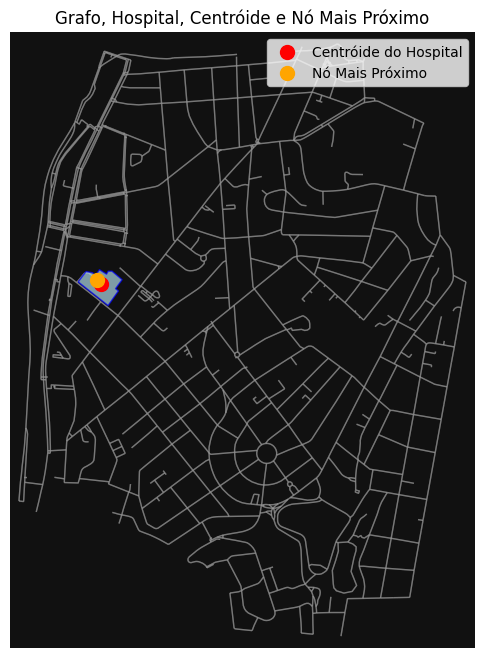

In [65]:
# Plotar o grafo
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.5, node_size=0
)

# Adicionar o polígono do hospital ao mapa
gdf_hospital.plot(ax=eixo, facecolor="lightblue", edgecolor="blue", alpha=0.7, zorder=2, label="Hospital")

# Adicionar o centróide do hospital
plt.scatter(
    centroide_hospital.x,
    centroide_hospital.y,
    c="red",
    s=100,
    zorder=3,
    label="Centróide do Hospital"
)

# Adicionar o nó mais próximo
nodo_x = grafo_rede_viaria.nodes[nodo_central]["x"]
nodo_y = grafo_rede_viaria.nodes[nodo_central]["y"]
plt.scatter(
    nodo_x,
    nodo_y,
    c="orange",
    s=100,
    zorder=4,
    label="Nó Mais Próximo"
)

# Configurações de legenda e título
plt.legend()
plt.title("Grafo, Hospital, Centróide e Nó Mais Próximo")
plt.show()

### 5.4.2 Isócronas considerando o tempo de viagem


Para gerar as isócronas com base no tempo de viagem, inicialmente vamos definir a velocidade de deslocamento e os tempos de viagem que delimitam as isócronas.

In [66]:
velocidade_deslocamento = 4  # Velocidade de caminhada em km/h
tempos_viagem = [6, 12, 18, 24]  # Tempos de viagem em minutos

A função `gerar_poligonos_isocronas` é utilizada para criar áreas alcançáveis a partir do ponto central na rede, baseando-se no tempo de viagem.

In [67]:
poligonos_tempo = gerar_poligonos_isocronas(
    grafo=grafo_rede_viaria,
    nodo_central=nodo_central,
    valores_metrica=tempos_viagem,
    metrica="tempo_viagem",  # Baseado no tempo de viagem
    buffer_arestas=20,  # Buffer nas arestas (em metros)
    buffer_nodos=5,  # Buffer nos nós (em metros)
    preencher=True  # Preencher os polígonos
)

<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union


As isócronas geradas são exibidas no console para inspeção.

In [68]:
for i, poligono in enumerate(poligonos_tempo):
    print(f"Isócrona para tempo ≤ {tempos_viagem[i]} minutos:", poligono)

Isócrona para tempo ≤ 6 minutos: POLYGON ((332514.6808119006 7392052.429004239, 332514.3793018412 7392052.662296823, 332513.9425385049 7392053.07468581, 332513.4903808433 7392053.470135342, 332513.2294006447 7392053.748025752, 332512.952209111 7392054.009748122, 332512.55797009857 7392054.462961636, 332512.1467505321 7392054.900826172, 332511.91426504694 7392055.202958996, 332511.66406154534 7392055.490590623, 332511.31614359486 7392055.980263969, 332510.94982239197 7392056.456326635, 332510.74807058414 7392056.779792168, 332510.5272647095 7392057.090563002, 332510.2290184613 7392057.611980358, 332509.9111234951 7392058.12165641, 332509.7420483421 7392058.4633395085, 332509.55276657845 7392058.794256653, 332509.30706430686 7392059.342396484, 332509.04065707966 7392059.880777464, 332508.90588686994 7392060.237387528, 332508.74995210185 7392060.585264073, 332508.55916005175 7392061.154847497, 332508.34680621314 7392061.716748498, 332508.2476388582 7392062.084851174, 332508.126552822 7392

Os polígonos das isócronas são armazenados em um `GeoDataFrame` para facilitar a manipulação e a plotagem.

In [69]:
gdf_isocronas_tempo = gpd.GeoDataFrame(geometry=poligonos_tempo)

Por fim, plotamos as isócronas.

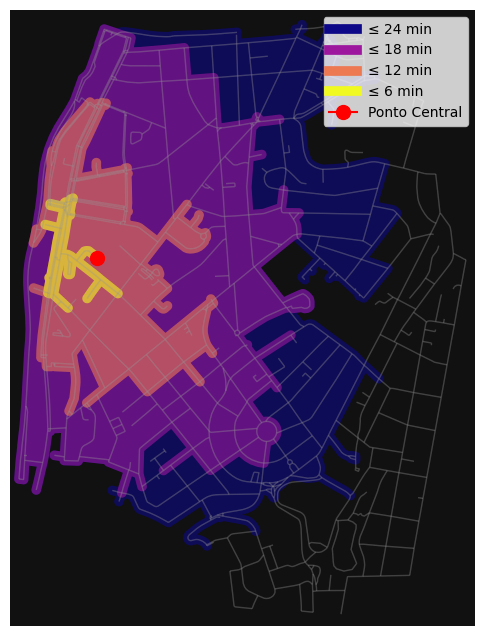

In [70]:
# Definir cores das isócronas
cores_isocronas = ox.plot.get_colors(n=len(tempos_viagem), cmap="plasma", start=0)

# Plotar a rede viária e os polígonos das isócronas
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
gdf_isocronas_tempo.plot(ax=eixo, color=cores_isocronas, ec="none", alpha=0.6, zorder=-1)

# Adicionar o ponto central ao gráfico
nodo_central_x, nodo_central_y = grafo_rede_viaria.nodes[nodo_central]["x"], grafo_rede_viaria.nodes[nodo_central]["y"]
eixo.scatter(nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central")

# Criar a legenda com cores associadas aos tempos de viagem
legenda_tempos = [
    Line2D([0], [0], color=cores_isocronas[i], lw=7, label=f"≤ {tempo} min")
    for i, tempo in enumerate(sorted(tempos_viagem, reverse=True))
]

# Adicionar o ponto central à legenda
legenda_ponto_central = Line2D([0], [0], marker="o", color="red", label="Ponto Central", markersize=10)

# Adicionar a legenda ao gráfico
plt.legend(
    handles=legenda_tempos + [legenda_ponto_central],
    loc="upper right"
)

# Mostrar o gráfico
plt.show()

### 5.4.3 Isócronas considerando a distância percorrida

Para gerar as isócronas com base na distância percorrida, inicialmente vamos definir os valores de distâncias em metros que delimitam as isócronas.

In [71]:
distancias_deslocamento = [400, 800, 1200, 1600]  # Distâncias em metros

A função `gerar_poligonos_isocronas` é utilizada para criar áreas alcançáveis a partir do ponto central na rede, baseando-se na distância percorrida.

In [72]:
poligonos_distancia = gerar_poligonos_isocronas(
    grafo=grafo_rede_viaria,
    nodo_central=nodo_central,
    valores_metrica=distancias_deslocamento,
    metrica="length",  # Baseado na distância
    buffer_arestas=20,  # Buffer nas arestas (em metros)
    buffer_nodos=5,  # Buffer nos nós (em metros)
    preencher=True  # Preencher os polígonos
)

<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union
<ipython-input-45-7d232611bd41>:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nova_isocrona = gpd.GeoSeries(todas_geometrias).unary_union


As isócronas criadas são exibidas no console para verificar o resultado.

In [73]:
for i, poligono in enumerate(poligonos_distancia):
    print(f"Isócrona para distância ≤ {distancias_deslocamento[i]} metros:", poligono)

Isócrona para distância ≤ 400 metros: POLYGON ((332565.98920575593 7392059.97722959, 332565.8190127417 7392059.352144108, 332565.70008733525 7392059.03998713, 332565.60162079544 7392058.72078567, 332565.35089738877 7392058.123428744, 332565.12025481026 7392057.518035056, 332564.971305329 7392057.21903793, 332564.8420257171 7392056.911024918, 332564.5339583936 7392056.341119618, 332564.245087465 7392055.761247994, 332564.06754837185 7392055.478290221, 332563.908700723 7392055.184431996, 332563.5462563461 7392054.647466834, 332563.2019390457 7392054.0987017425, 332562.9975201357 7392053.834508357, 332562.81063424324 7392053.5576349385, 332562.3973033485 7392053.058781175, 332562.00085564196 7392052.546407531, 332561.77152558696 7392052.303522868, 332561.55840125814 7392052.046300689, 332561.0981644419 7392051.590362552, 332560.6534043435 7392051.119314801, 332560.40137171396 7392050.900077969, 332560.16406145593 7392050.664984223, 332559.6613510561 7392050.256352651, 332559.172561843 739

Os polígonos das isócronas são armazenados em um `GeoDataFrame` para facilitar a manipulação e a plotagem.

In [74]:
gdf_isocronas_distancia = gpd.GeoDataFrame(geometry=poligonos_distancia)

Por fim, plotamos as isócronas.

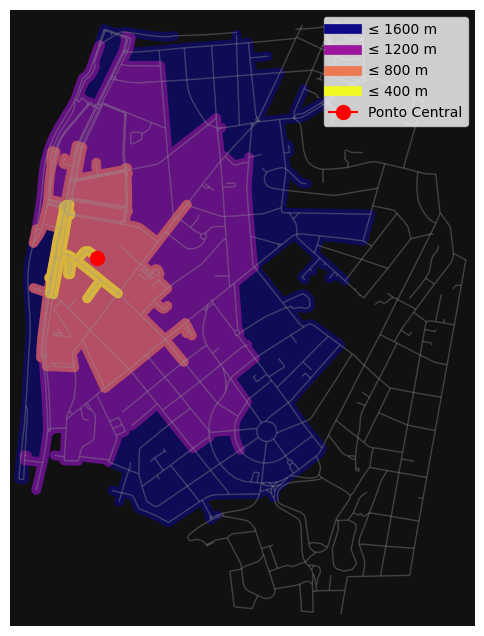

In [75]:
# Definir cores das isócronas
cores_isocronas = ox.plot.get_colors(n=len(distancias_deslocamento), cmap="plasma", start=0)

# Plotar a rede viária e os polígonos das isócronas
figura, eixo = ox.plot_graph(
    grafo_rede_viaria, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
gdf_isocronas_distancia.plot(ax=eixo, color=cores_isocronas, ec="none", alpha=0.6, zorder=-1)

# Adicionar o ponto central ao gráfico
nodo_central_x, nodo_central_y = grafo_rede_viaria.nodes[nodo_central]["x"], grafo_rede_viaria.nodes[nodo_central]["y"]
eixo.scatter(nodo_central_x, nodo_central_y, c="red", s=100, zorder=10, label="Ponto Central")

# Criar a legenda com cores associadas às distâncias de deslocamento
legenda_distancias = [
    Line2D([0], [0], color=cores_isocronas[i], lw=7, label=f"≤ {distancia} m")
    for i, distancia in enumerate(sorted(distancias_deslocamento, reverse=True))
]

# Adicionar o ponto central à legenda
legenda_ponto_central = Line2D([0], [0], marker="o", color="red", label="Ponto Central", markersize=10)

# Adicionar a legenda ao gráfico
plt.legend(
    handles=legenda_distancias + [legenda_ponto_central],
    loc="upper right"
)

# Mostrar o gráfico
plt.show()